In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from keras.models import load_model

In [37]:
test_data_dir="database/testing"

In [38]:
model = load_model('face_recognition_model.h5')

In [39]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Adjust the target size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

1/1 [==============================] - 1s 792ms/step
[[0.12586044 0.72752136 0.14661819]]


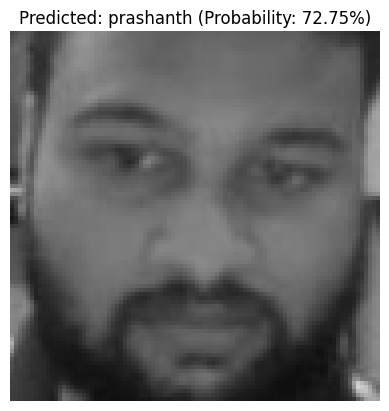

1/1 [==============================] - 0s 33ms/step
[[0.19840528 0.5840118  0.21758294]]


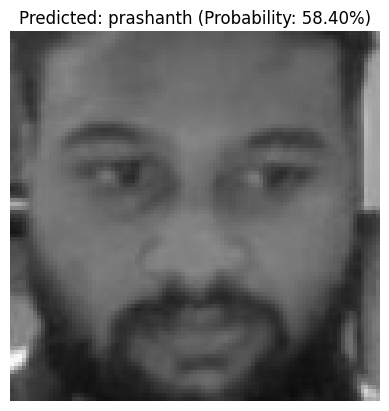

1/1 [==============================] - 0s 33ms/step
[[0.13252579 0.58980405 0.27767015]]


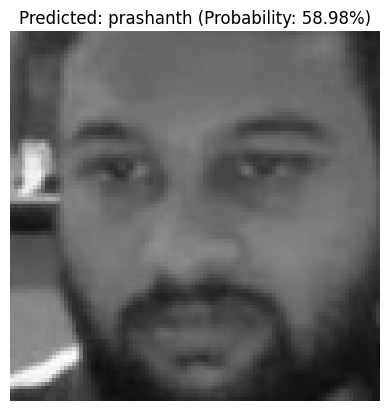

1/1 [==============================] - 0s 32ms/step
[[0.22099642 0.65226746 0.12673613]]


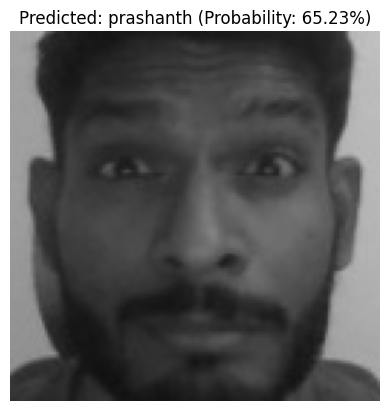

1/1 [==============================] - 0s 31ms/step
[[0.15411395 0.6822648  0.16362125]]


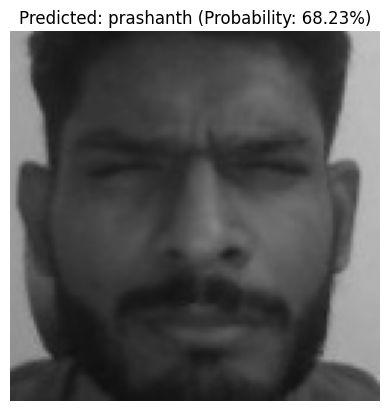

1/1 [==============================] - 0s 31ms/step
[[0.16259919 0.7003791  0.13702172]]


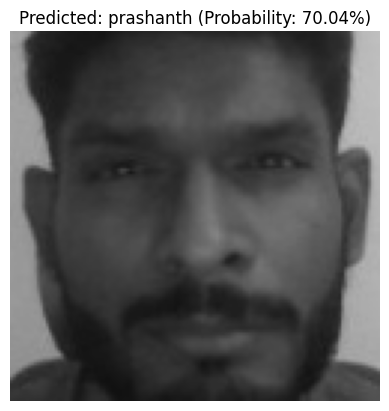

1/1 [==============================] - 0s 31ms/step
[[0.23053685 0.65983105 0.10963214]]


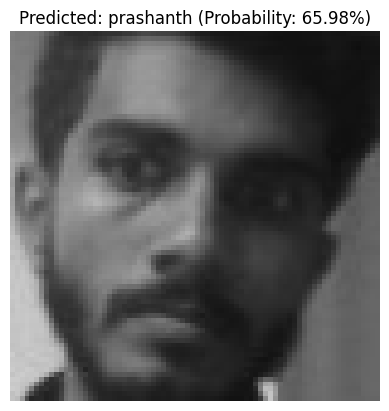

1/1 [==============================] - 0s 35ms/step
[[0.2026626  0.68776405 0.1095733 ]]


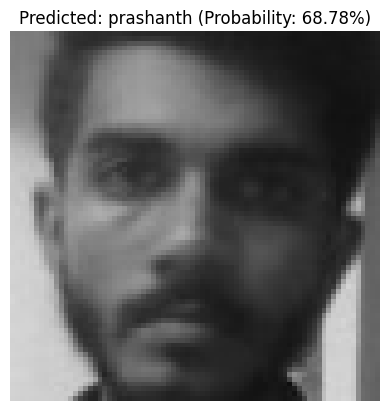

1/1 [==============================] - 0s 31ms/step
[[0.16188267 0.67149776 0.16661958]]


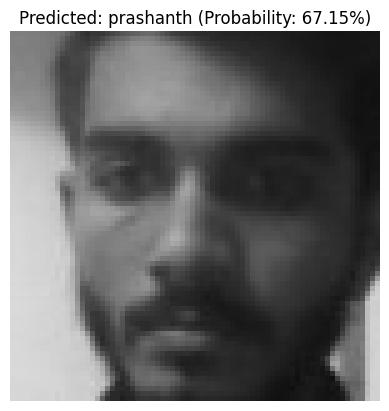

In [40]:
for image_file in os.listdir(test_data_dir):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(test_data_dir, image_file)
        
        
        img = preprocess_image(image_path)
        
        
        prediction = model.predict(img)
        
       
        predicted_class_index = np.argmax(prediction)
        class_names = ['kalai','prashanth','sairam']
        predicted_class = class_names[predicted_class_index]
        
       
        probability = prediction[0][predicted_class_index]
        print(prediction)
        
        
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        
        plt.figure()
        plt.imshow(img_rgb)
        plt.title(f'Predicted: {predicted_class} (Probability: {probability * 100:.2f}%)')
        plt.axis('off')
        plt.show()